<a href="https://colab.research.google.com/github/youngyoung0511/Sound-AI/blob/Data-processing/1110_Onset_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# setting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install PyWavelets librosa matplotlib numpy
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pywt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.8 MB/s eta 0:00:00


# onset detection - 타격 시점 감지

음악 파일 로드 및 .wav 변환

'/content/drive/My Drive/soundAI/BoysLikeGirls.mp3'

In [ ]:
audio_path = '/content/drive/My Drive/soundAI/BoysLikeGirls.mp3'  # 여기에 mp3 파일 경로를 입력하세요
y, sr = librosa.load(audio_path, sr=None)


자동 온셋 디텍션 검출로 타격 시점 감지

타격 시점의 타임 스탬프를 기록

In [ ]:
# 온셋 디텍션
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, backtrack=True)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# 타격 시점 출력
print("Detected Onset Times:", onset_times)


Detected Onset Times: [  0.19736961   0.6153288    1.42802721   1.62539683   1.82276644
   2.03174603   2.6122449    2.80961451   2.99537415   3.2275737
   3.42494331   3.58748299   4.04027211   4.22603175   4.43501134
   4.63238095   4.81814059   4.92263039   5.0155102    5.2244898
   5.39863946   5.59600907   5.77015873   5.87464853   6.00235828
   6.08362812   6.17650794   6.28099773   6.39709751   6.57124717
   6.98920635   7.36072562   7.50004535   7.59292517   7.68580499
   7.80190476   7.99927438   8.06893424   8.19664399   8.38240363
   8.57977324   8.80036281   8.98612245   9.09061224   9.18349206
   9.39247166   9.58984127   9.78721088   9.9845805   10.18195011
  10.30965986  10.39092971  10.57668934  10.69278912  10.76244898
  10.90176871  10.99464853  11.20362812  11.27328798  11.40099773
  11.57514739  11.78412698  11.9814966   12.07437642  12.19047619
  12.39945578  12.58521542  12.68970522  12.79419501  12.88707483
  12.99156463  13.35147392  13.40952381  13.58367347  13

템포와 비트 추출

In [ ]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

In [ ]:
# 템포와 박자 정보 출력
print(f"Estimated Tempo: {tempo} BPM")
print("Detected Beat Times:", beat_times)

Estimated Tempo: [74.89809783] BPM
Detected Beat Times: [  0.23219955   1.04489796   1.85759637   2.64707483   3.44816327
   4.26086168   5.05034014   5.83981859   6.62929705   7.41877551
   8.21986395   9.02095238   9.82204082  10.62312925  11.31972789
  12.01632653  12.63165533  13.39791383  14.15256236  15.02331066
  15.82439909  16.62548753  17.41496599  18.21605442  19.02875283
  19.81823129  20.61931973  21.42040816  22.2214966   23.02258503
  23.82367347  24.6247619   25.42585034  26.2153288   27.01641723
  27.82911565  28.6185941   29.41968254  30.23238095  31.02185941
  31.82294785  32.62403628  33.42512472  34.22621315  35.02730159
  35.82839002  36.62947846  37.59310658  38.24326531  39.02113379
  39.82222222  40.62331066  41.42439909  42.22548753  43.02657596
  43.8276644   44.61714286  45.41823129  46.20770975  46.98557823
  47.8214966   48.62258503  49.42367347  50.2247619   51.00263039
  51.8153288   52.61641723  53.41750567  54.2185941   55.01968254
  55.82077098  56.62

비트 간 간격 계산

In [ ]:
beat_intervals = np.diff(beat_times)
mean_interval = np.mean(beat_intervals)
print(f"Mean Beat Interval: {mean_interval}")

Mean Beat Interval: 0.7982591131690773


박자 추정

각 비트 간의 간격을 분석하여 4/4인지 3/4인지 추정

비트 간 간격을 평균 내고 일정 간격으로 반복되는 패턴 감지

In [ ]:
import numpy as np

# 비트 간의 간격 배열
beat_intervals = np.diff(beat_times)
mean_interval = np.mean(beat_intervals)
print("Mean Beat Interval:", mean_interval)

# 박자 패턴을 위한 기본 간격 설정
pattern_detected = False

# 다양한 박자 패턴 시도
for beat_pattern in [4, 3, 5, 6, 7]:  # 감지하고자 하는 박자 패턴 목록
    # 비트 간 간격이 일정하게 유지되는지 확인
    pattern_check = np.allclose(beat_intervals[:len(beat_intervals) // beat_pattern * beat_pattern].reshape(-1, beat_pattern).mean(axis=1), mean_interval, atol=0.1)

    if pattern_check:
        print(f"Detected Time Signature: {beat_pattern}/4 or {beat_pattern}/8")
        pattern_detected = True
        break

if not pattern_detected:
    print("Detected Time Signature is irregular or complex.")


Mean Beat Interval: 0.7982591131690773
Detected Time Signature: 4/4 or 4/8


4/4 or 4/8이렇게 애매하게 나온것에 대한 후처리

4/4= 한 마디에 4박이 있고 1/4 음표 길이

4/8= 한 마디에 4박이 있고 1/8 음표 길이

템포(BPM)와 비트 간격을 기준으로 4/4로 고정하는 규칙 추가

In [ ]:
import numpy as np

# 비트 간의 간격 배열
beat_intervals = np.diff(beat_times)
mean_interval = np.mean(beat_intervals)
print("Mean Beat Interval:", mean_interval)

# 박자 패턴을 위한 기본 간격 설정
pattern_detected = False

# 템포와 비트 간격에 따라 4/4로 고정하는 조건 추가
if (120 <= tempo[0] <= 140) and (0.4 <= mean_interval <= 0.5):
    print("Detected Time Signature: 4/4")
else:
    # 다양한 박자 패턴 확인
    for beat_pattern in [4, 3, 5, 6, 7]:  # 감지하고자 하는 박자 패턴 목록
        try:
            pattern_check = np.allclose(
                beat_intervals[:len(beat_intervals) // beat_pattern * beat_pattern].reshape(-1, beat_pattern).mean(axis=1),
                mean_interval,
                atol=0.05
            )
            if pattern_check:
                print(f"Detected Time Signature: {beat_pattern}/4 or {beat_pattern}/8")
                pattern_detected = True
                break
        except ValueError:
            # 간격 배열이 beat_pattern으로 나누어지지 않을 경우 발생할 수 있는 오류 방지
            continue

    if not pattern_detected:
        print("Detected Time Signature is irregular or complex.")


Mean Beat Interval: 0.4615268329554043
Detected Time Signature: 4/4


전체코드

In [ ]:
import librosa
import numpy as np

# 오디오 파일 로드
audio_path = '/content/drive/My Drive/soundAI/BoysLikeGirls.mp3'  # 여기에 mp3 파일 경로를 입력하세요
y, sr = librosa.load(audio_path, sr=None)

# 온셋 디텍션
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, backtrack=True)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# 템포와 비트 추출
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# 템포와 박자 정보 출력
print(f"Estimated Tempo: {tempo} BPM")  # 비트 후처리 필요

# 비트 간 간격 계산
beat_intervals = np.diff(beat_times)
mean_interval = np.mean(beat_intervals)
interval_variance = np.var(beat_intervals)  # 비트 간격의 분산
print(f"Mean Beat Interval: {mean_interval}")
print(f"Beat Interval Variance: {interval_variance}")

# BPM 조정 (두 배 템포를 고려)
adjusted_tempo = tempo
if adjusted_tempo < 80:  # 템포가 절반으로 추정된 경우 두 배로 조정
    adjusted_tempo *= 2
print("Adjusted Tempo:", adjusted_tempo)

# 박자 패턴을 위한 기본 간격 설정
pattern_detected = False

# 4/4 우선 고정 조건 추가
# 템포와 비트 간격이 일정하고, 비트 간격 분산이 낮고, 4개의 비트가 일정한 경우 4/4로 고정
if (120 <= adjusted_tempo <= 160) and (0.3 <= mean_interval <= 0.5) and interval_variance < 0.002:
    # 4개의 비트 패턴을 검사하여 4/4로 우선 고정
    four_beat_pattern_check = np.allclose(beat_intervals[:len(beat_intervals) // 4 * 4].reshape(-1, 4).mean(axis=1), mean_interval, atol=0.05)
    if four_beat_pattern_check:
        print("Detected Time Signature: 4/4")
    else:
        # 다양한 박자 패턴 확인
        for beat_pattern in [4, 3, 5, 6, 7]:  # 감지하고자 하는 박자 패턴 목록
            try:
                pattern_check = np.allclose(
                    beat_intervals[:len(beat_intervals) // beat_pattern * beat_pattern].reshape(-1, beat_pattern).mean(axis=1),
                    mean_interval,
                    atol=0.05
                )
                if pattern_check:
                    print(f"Detected Time Signature: {beat_pattern}/4 or {beat_pattern}/8")
                    pattern_detected = True
                    break
            except ValueError:
                # 간격 배열이 beat_pattern으로 나누어지지 않을 경우 발생할 수 있는 오류 방지
                continue
else:
    print("Detected Time Signature is irregular or complex.")


Estimated Tempo: [74.89809783] BPM
Mean Beat Interval: 0.7982591131690773
Beat Interval Variance: 0.0012164461200696512
Adjusted Tempo: [149.79619565]
Detected Time Signature is irregular or complex.


4/4인데 5/4로 인식되는 경우:

4개의 비트가 아니라 5개의 비트로 반복되는 패턴이 감지되어 이렇게 추출되는 것.

템포 및 비트 간격 분석에 추가적인 조정이 필요

개선 방안 요약
비트 간격 클러스터링 사용: 비트 간격을 4개의 주요 클러스터로 나누어 그 분포가 일정하게 유지되는지 확인합니다. 만약 4개의 주요 클러스터가 존재하고 일정하다면 4/4 박자로 인식합니다.

비트 간격 히스토그램을 통한 패턴 확인: 특정 간격이 반복되는지 히스토그램을 사용해 시각적으로 확인하고, 반복되는 패턴이 있다면 이를 4/4로 인식하도록 합니다.

박자 고정 조건을 더 강화: 비트 간 간격의 특정 패턴이 없고 간격이 일정하다면 4/4로 고정합니다.

In [ ]:
import librosa
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter

# 오디오 파일 로드
audio_path = '/content/drive/My Drive/soundAI/BoysLikeGirls.mp3'  # 여기에 mp3 파일 경로를 입력하세요
y, sr = librosa.load(audio_path, sr=None)

# 온셋 디텍션
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, backtrack=True)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# 템포와 비트 추출
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# 템포와 박자 정보 출력
print(f"Estimated Tempo: {tempo} BPM")  # 비트 후처리 필요

# 비트 간 간격 계산
beat_intervals = np.diff(beat_times)
mean_interval = np.mean(beat_intervals)
interval_variance = np.var(beat_intervals)  # 비트 간격의 분산
print(f"Mean Beat Interval: {mean_interval}")
print(f"Beat Interval Variance: {interval_variance}")

# BPM 조정 (두 배 템포를 고려)
adjusted_tempo = tempo
if adjusted_tempo < 80:  # 템포가 절반으로 추정된 경우 두 배로 조정
    adjusted_tempo *= 2
print("Adjusted Tempo:", adjusted_tempo)

# 클러스터링 기반 4/4 인식
pattern_detected = False

# 클러스터링: 4개의 주요 비트 간격 그룹 확인
kmeans = KMeans(n_clusters=4, random_state=0).fit(beat_intervals.reshape(-1, 1))
cluster_counts = Counter(kmeans.labels_)

# 4개의 주요 클러스터가 일정하게 반복될 경우 4/4로 고정
if max(cluster_counts.values()) >= len(beat_intervals) * 0.8:
    print("Detected Time Signature: 4/4")
else:
    # 다양한 박자 패턴 확인
    for beat_pattern in [4, 3, 5, 6, 7]:  # 감지하고자 하는 박자 패턴 목록
        try:
            pattern_check = np.allclose(
                beat_intervals[:len(beat_intervals) // beat_pattern * beat_pattern].reshape(-1, beat_pattern).mean(axis=1),
                mean_interval,
                atol=0.05
            )
            if pattern_check:
                print(f"Detected Time Signature: {beat_pattern}/4 or {beat_pattern}/8")
                pattern_detected = True
                break
        except ValueError:
            # 간격 배열이 beat_pattern으로 나누어지지 않을 경우 발생할 수 있는 오류 방지
            continue

    if not pattern_detected:
        print("Detected Time Signature is irregular or complex.")


Estimated Tempo: [74.89809783] BPM
Mean Beat Interval: 0.7982591131690773
Beat Interval Variance: 0.0012164461200696512
Adjusted Tempo: [149.79619565]
Detected Time Signature: 4/4


# 이것저것 시도(시각화 등)

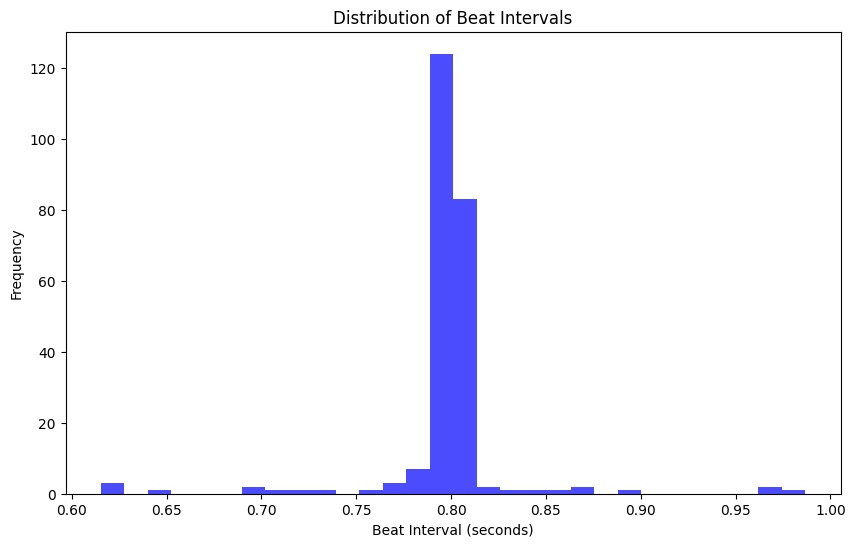

In [ ]:
import matplotlib.pyplot as plt

# 비트 간격 시각화
plt.figure(figsize=(10, 6))
plt.hist(beat_intervals, bins=30, color='blue', alpha=0.7)
plt.xlabel("Beat Interval (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Beat Intervals")
plt.show()


특정 간격이 반복되는 것을 확인함.

히스토그램을 보면 대부분의 비트 간격이 0.80초에 몰려있음.

이는 비트 간격이 거의 일정하게 유지되고 있다는 것을 뜻하고 일정한 박자를 가지고 있음을 뜻함.

CWT 변환 및 특징 추출

각 타격 시점에서 CWT 수행하여 주파수 정보 추출

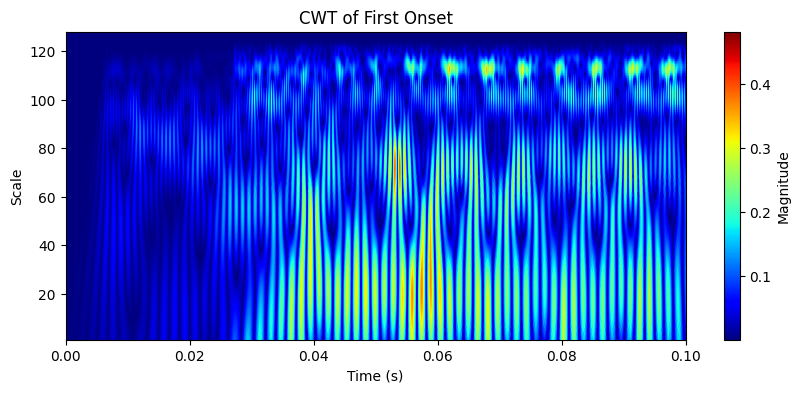

In [ ]:
# CWT 변환
cwt_data = []
scales = np.arange(1, 128)  # 원하는 주파수 대역에 맞춰 스케일 설정

for onset in onset_times:
    # 해당 타격 시점에서 0.1초 길이의 신호를 추출
    start_sample = int(onset * sr)
    end_sample = start_sample + int(0.1 * sr)
    segment = y[start_sample:end_sample]

    # CWT 수행
    coef, freqs = pywt.cwt(segment, scales, 'morl', sampling_period=1/sr)
    cwt_data.append(coef)

# 시각화 (예: 첫 번째 타격 시점의 CWT)
plt.figure(figsize=(10, 4))
plt.imshow(np.abs(cwt_data[0]), extent=[0, 0.1, 1, 128], cmap='jet', aspect='auto', vmax=abs(cwt_data[0]).max(), vmin=abs(cwt_data[0]).min())
plt.colorbar(label='Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Scale')
plt.title('CWT of First Onset')
plt.show()


cwt_data: 각 타격 시점의 CWT 결과를 저장한 리스트. 이 데이터 2D 배열 형태이며, 이를 모델에 입력하여 타격음을 분류

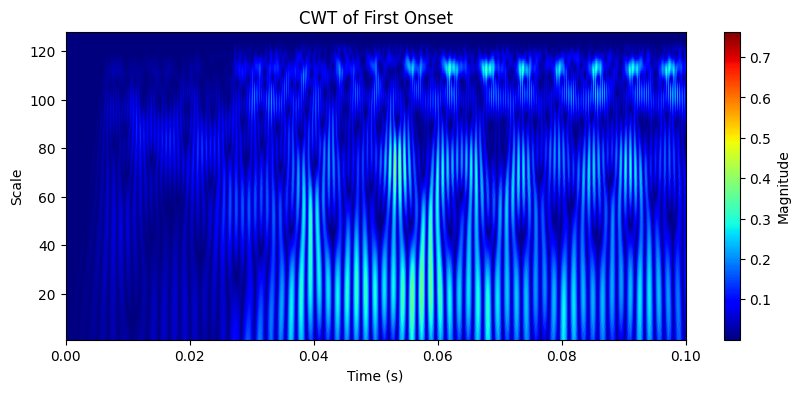

In [ ]:
plt.figure(figsize=(10, 4))
plt.imshow(np.abs(cwt_data[0]), extent=[0, 0.1, 1, 128], cmap='jet', aspect='auto', vmax=abs(cwt_data[10]).max(), vmin=abs(cwt_data[10]).min())
plt.colorbar(label='Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Scale')
plt.title('CWT of First Onset')
plt.show()

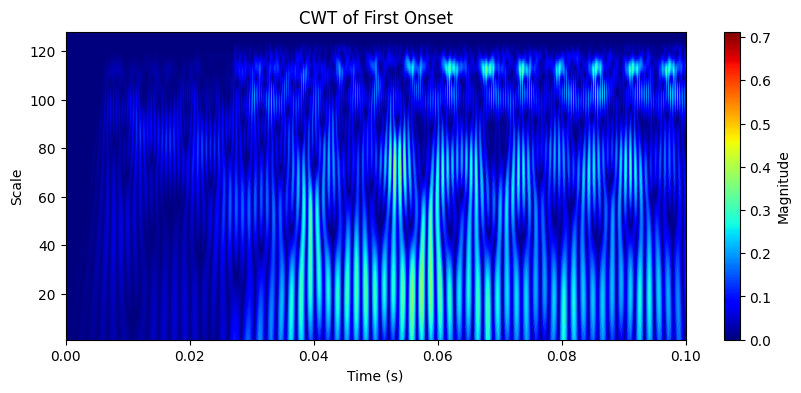

In [ ]:
plt.figure(figsize=(10, 4))
plt.imshow(np.abs(cwt_data[0]), extent=[0, 0.1, 1, 128], cmap='jet', aspect='auto', vmax=abs(cwt_data[7]).max(), vmin=abs(cwt_data[7]).min())
plt.colorbar(label='Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Scale')
plt.title('CWT of First Onset')
plt.show()

# 적용

MagicCarpetRide_drum.mp3

Every Day.mp3

music.mp3 //꿈나라별나라


'/content/drive/My Drive/soundAI/BoysLikeGirls.mp3'

In [ ]:
import librosa
import numpy as np

audio_path = '/content/drive/My Drive/soundAI/music.mp3'  # 여기에 mp3 파일 경로를 입력하세요
y, sr = librosa.load(audio_path, sr=None)


# 온셋 디텍션
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, backtrack=True)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# 타격 시점 출력
# print("Detected Onset Times:", onset_times)

# 템포와 비트 추출
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# 템포와 박자 정보 출력
# print(f"Estimated Tempo: {tempo} BPM") #비트 후처리 필요
#print("Detected Beat Times:", beat_times)

# 비트 간 간격 계산
beat_intervals = np.diff(beat_times)
mean_interval = np.mean(beat_intervals)
interval_variance = np.var(beat_intervals)  # 비트 간격의 분산
print(f"Mean Beat Interval: {mean_interval}")
print(f"Beat Interval Variance: {interval_variance}")

# BPM 조정 (두 배 템포를 고려)
adjusted_tempo = tempo
if adjusted_tempo < 80:  # 템포가 절반으로 추정된 경우 두 배로 조정
    adjusted_tempo *= 2
print("Adjusted Tempo:", adjusted_tempo)

# 비트 간 간격을 토대로 박자 계산


# 박자 패턴을 위한 기본 간격 설정
pattern_detected = False

# 비트 간격이 일정하고 분산이 낮으면 4/4로 고정
if (120 <= adjusted_tempo <= 160) and (0.3 <= mean_interval <= 0.5) and interval_variance < 0.01:
    print("Detected Time Signature: 4/4")
else:
    # 다양한 박자 패턴 확인
    for beat_pattern in [4, 3, 5, 6, 7]:  # 감지하고자 하는 박자 패턴 목록
        try:
            pattern_check = np.allclose(
                beat_intervals[:len(beat_intervals) // beat_pattern * beat_pattern].reshape(-1, beat_pattern).mean(axis=1),
                mean_interval,
                atol=0.05
            )
            if pattern_check:
                print(f"Detected Time Signature: {beat_pattern}/4 or {beat_pattern}/8")
                pattern_detected = True
                break
        except ValueError:
            # 간격 배열이 beat_pattern으로 나누어지지 않을 경우 발생할 수 있는 오류 방지
            continue

    if not pattern_detected:
        print("Detected Time Signature is irregular or complex.")


Mean Beat Interval: 0.5542620689655172
Beat Interval Variance: 0.0002850654194742104
Adjusted Tempo: [108.17307692]
Detected Time Signature: 6/4 or 6/8


4/4인데 5/8 또는 5/4로 추출되는 경우를 위한 코드 개선

K 평균 클러스터링을 사용하여 비트 간격을 4개의 주요 그룹으로 나누어 일정한 간격이 유지될 때 4/4로 인식

MagicCarpetRide_drum.mp3

Every Day.mp3

music.mp3 //꿈나라별나라

'/content/drive/My Drive/soundAI/BoysLikeGirls.mp3'

/////////최종 코드//////////

In [ ]:
import librosa
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter

# 오디오 파일 로드
audio_path = '/content/drive/My Drive/soundAI/music.mp3'  # 여기에 mp3 파일 경로를 입력하세요
y, sr = librosa.load(audio_path, sr=None)

# 온셋 디텍션
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, backtrack=True)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# 템포와 비트 추출
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# 템포와 박자 정보 출력
# print(f"Estimated Tempo: {tempo} BPM")  # 비트 후처리 필요

# 비트 간 간격 계산
beat_intervals = np.diff(beat_times)
mean_interval = np.mean(beat_intervals)
interval_variance = np.var(beat_intervals)  # 비트 간격의 분산
print(f"Mean Beat Interval: {mean_interval}")
print(f"Beat Interval Variance: {interval_variance}")

# BPM 조정 (두 배 템포를 고려)
adjusted_tempo = tempo
if adjusted_tempo < 80:  # 템포가 절반으로 추정된 경우 두 배로 조정
    adjusted_tempo *= 2
print("Adjusted Tempo:", adjusted_tempo)

# 클러스터링 기반 4/4 인식
pattern_detected = False

# 클러스터링: 4개의 주요 비트 간격 그룹 확인
kmeans = KMeans(n_clusters=4, random_state=0).fit(beat_intervals.reshape(-1, 1))
cluster_counts = Counter(kmeans.labels_)

# 4개의 주요 클러스터가 일정하게 반복될 경우 4/4로 고정
if max(cluster_counts.values()) >= len(beat_intervals) * 0.8:
    print("Detected Time Signature: 4/4")
else:
    # 다양한 박자 패턴 확인
    for beat_pattern in [4, 3, 5, 6, 7]:  # 감지하고자 하는 박자 패턴 목록
        try:
            pattern_check = np.allclose(
                beat_intervals[:len(beat_intervals) // beat_pattern * beat_pattern].reshape(-1, beat_pattern).mean(axis=1),
                mean_interval,
                atol=0.05
            )
            if pattern_check:
                #print(f"Detected Time Signature: {beat_pattern}/4 or {beat_pattern}/8")
                print(f"Detected Time Signature: {beat_pattern}/4")
                pattern_detected = True
                break
        except ValueError:
            # 간격 배열이 beat_pattern으로 나누어지지 않을 경우 발생할 수 있는 오류 방지
            continue

    if not pattern_detected:
        print("Detected Time Signature is irregular or complex.")


Mean Beat Interval: 0.5542620689655172
Beat Interval Variance: 0.0002850654194742104
Adjusted Tempo: [108.17307692]
Detected Time Signature: 4/4
